In [8]:
# Importing libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/Users/sanket jha/OneDrive/Desktop/FDSPracticals/FDSMiniProject/StudentsPerformance.csv")

# Replacing space in column names with '_'
for col in data.columns:
    data.rename(columns={col: col.replace(" ", '_')}, inplace=True)
    
# prints first five rows
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
group = data.groupby(by='gender')

In [12]:
type(group)

pandas.core.groupby.generic.DataFrameGroupBy

In [13]:
group.ngroups

2

In [14]:
group.groups

{'female': [0, 1, 2, 5, 6, 9, 12, 14, 15, 17, 19, 21, 23, 27, 29, 30, 31, 32, 36, 37, 38, 41, 42, 44, 46, 47, 48, 54, 55, 56, 59, 63, 64, 67, 69, 70, 72, 78, 79, 80, 85, 86, 87, 88, 89, 90, 94, 97, 98, 99, 102, 105, 106, 108, 109, 110, 113, 114, 116, 117, 118, 119, 120, 122, 125, 129, 133, 138, 140, 141, 142, 145, 148, 152, 155, 156, 158, 161, 164, 165, 167, 168, 169, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 189, 190, 192, 194, 198, 199, ...], 'male': [3, 4, 7, 8, 10, 11, 13, 16, 18, 20, 22, 24, 25, 26, 28, 33, 34, 35, 39, 40, 43, 45, 49, 50, 51, 52, 53, 57, 58, 60, 61, 62, 65, 66, 68, 71, 73, 74, 75, 76, 77, 81, 82, 83, 84, 91, 92, 93, 95, 96, 100, 101, 103, 104, 107, 111, 112, 115, 121, 123, 124, 126, 127, 128, 130, 131, 132, 134, 135, 136, 137, 139, 143, 144, 146, 147, 149, 150, 151, 153, 154, 157, 159, 160, 162, 163, 166, 170, 171, 180, 184, 185, 186, 187, 188, 191, 193, 195, 196, 197, ...]}

In [15]:
group.size()

gender
female    518
male      482
dtype: int64

In [16]:
group.get_group('female').head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [17]:
group = data.groupby(by='gender')
group['math_score'].sum()

gender
female    32962
male      33127
Name: math_score, dtype: int64

In [18]:
group.mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [19]:
group.mean().add_prefix('mean_')

,mean_math_score,mean_reading_score,mean_writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [20]:
data.groupby(by='gender')['reading_score'].agg(
                               min_score = 'min', 
                               max_score = 'max',)

,min_score,max_score
gender,,
female,17,100
male,23,100


In [21]:
data.groupby("parental_level_of_education").size()

parental_level_of_education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

In [22]:
data.groupby("parental_level_of_education").filter(lambda x: len(x) == 222)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
3,male,group A,associate's degree,free/reduced,none,47,57,44
5,female,group B,associate's degree,standard,none,71,83,78
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
19,female,group C,associate's degree,free/reduced,none,54,58,61
...,...,...,...,...,...,...,...,...
968,female,group E,associate's degree,standard,none,68,76,67
977,male,group C,associate's degree,standard,none,62,65,58
979,female,group C,associate's degree,standard,none,91,95,94
986,female,group C,associate's degree,standard,none,40,59,51


In [24]:
# Grouped data by multiple columns.
group = data.groupby(by=['gender', 'test_preparation_course'])
grouped = group['writing_score'].mean()
pd.DataFrame(grouped)

writing_score
gender test_preparation_course               
female completed                    78.793478
       none                         68.982036
male   completed                    69.793103
       none                         59.649351

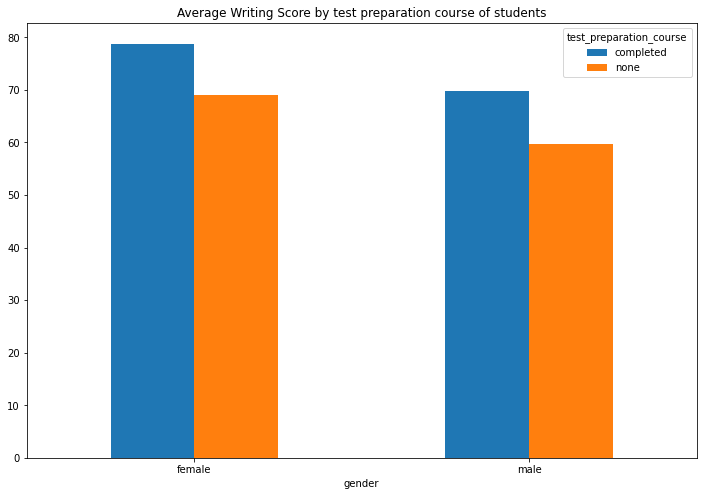

In [25]:
# Bar plot of grouped data.
grouped.unstack().plot(kind='bar', figsize=(12, 8))
plt.title('Average Writing Score by test preparation course of students')
plt.xticks(rotation=0)
plt.show()